<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">IRIS Flower Classification using TensorFlow</p>


![image.png](https://miro.medium.com/v2/resize:fit:1200/1*S2GII1ul0JjbZ0YaFvDByw.jpeg)

<p style="color:  #8a4baf; font-size: 20px; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Iris veri kümesi, makine öğrenimi ve istatistik alanında iyi bilinen ve sıklıkla kullanılan bir ölçüttür. Üç farklı iris çiçeği türünün çeşitli özelliklerinin ölçümlerinin bir koleksiyonunu içeren klasik bir veri kümesidir: Setosa, Versicolor ve Virginica. 
Bu veri kümesi, veri analizi, sınıflandırma ve örüntü tanıma tekniklerini keşfetmek ve uygulamak için temel bir örnek olarak hizmet vermektedir. Basitliği ve anlaşılırlığı ile Iris veri seti, hem yeni başlayanlar hem de deneyimli uygulayıcılar için bir mihenk taşı olmaya devam etmekte ve veri keşfi ve algoritma değerlendirmesi hakkında içgörüler sağlamaktadır.</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# Feature'lar üzerinden istatistiksel bilgilere bakalım

df.describe()       

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Hedef değişkenimiz üzerinden istatistiksel bilgilere bakalım

df.groupby("species").agg(["min","max","std","mean"]) 

sepal_length                       sepal_width                 \
                    min  max       std   mean         min  max       std   
species                                                                    
setosa              4.3  5.8  0.352490  5.006         2.3  4.4  0.379064   
versicolor          4.9  7.0  0.516171  5.936         2.0  3.4  0.313798   
virginica           4.9  7.9  0.635880  6.588         2.2  3.8  0.322497   

                  petal_length                       petal_width       \
             mean          min  max       std   mean         min  max   
species                                                                 
setosa      3.428          1.0  1.9  0.173664  1.462         0.1  0.6   
versicolor  2.770          3.0  5.1  0.469911  4.260         1.0  1.8   
virginica   2.974          4.5  6.9  0.551895  5.552         1.4  2.5   

                             
                 std   mean  
species                      
setosa      0.105386  0.246  
versicolor  0.197753  1.326  
virginica   0.274650  2.026

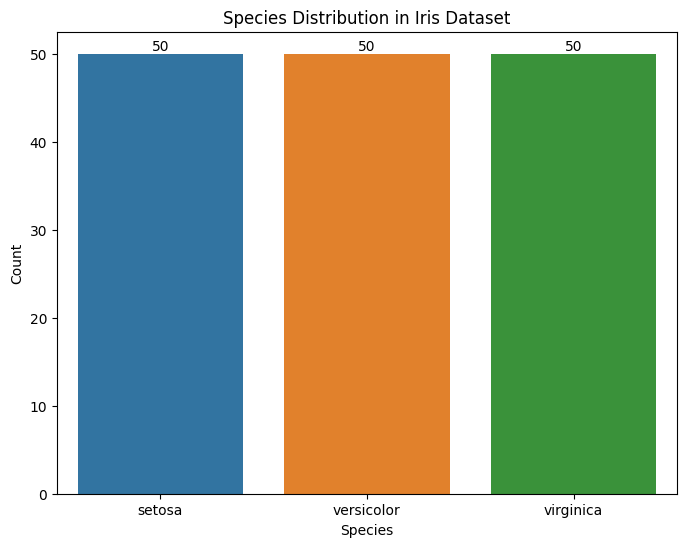

In [8]:
# Hedef değişkenimizin dağılımı

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='species')
ax.bar_label(ax.containers[0])
plt.title('Species Distribution in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2021/10/iris-flower.webp)

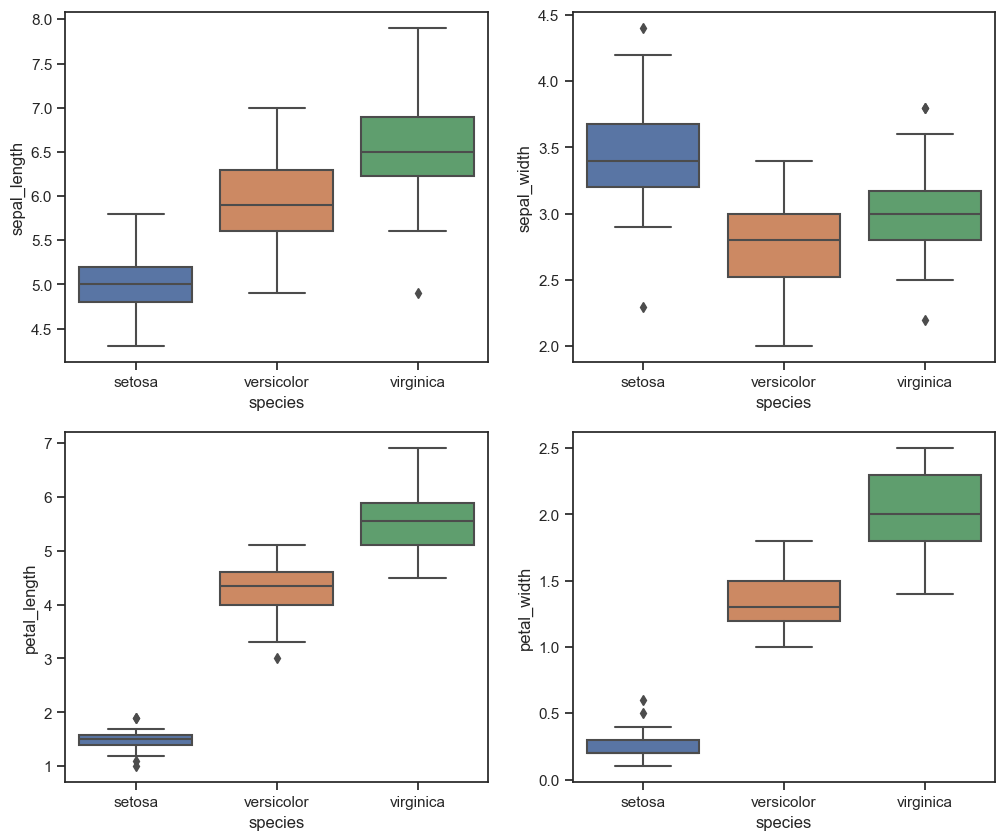

In [9]:
# Aykırı değerlerin durumu

sns.set(style = "ticks")
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)                                                 
sns.boxplot(x = "species", y = "sepal_length", data = df)
plt.subplot(2,2,2)
sns.boxplot(x = "species", y = "sepal_width", data = df)
plt.subplot(2,2,3)
sns.boxplot(x = "species", y = "petal_length", data = df)
plt.subplot(2,2,4)
sns.boxplot(x = "species", y = "petal_width", data = df)
plt.show()

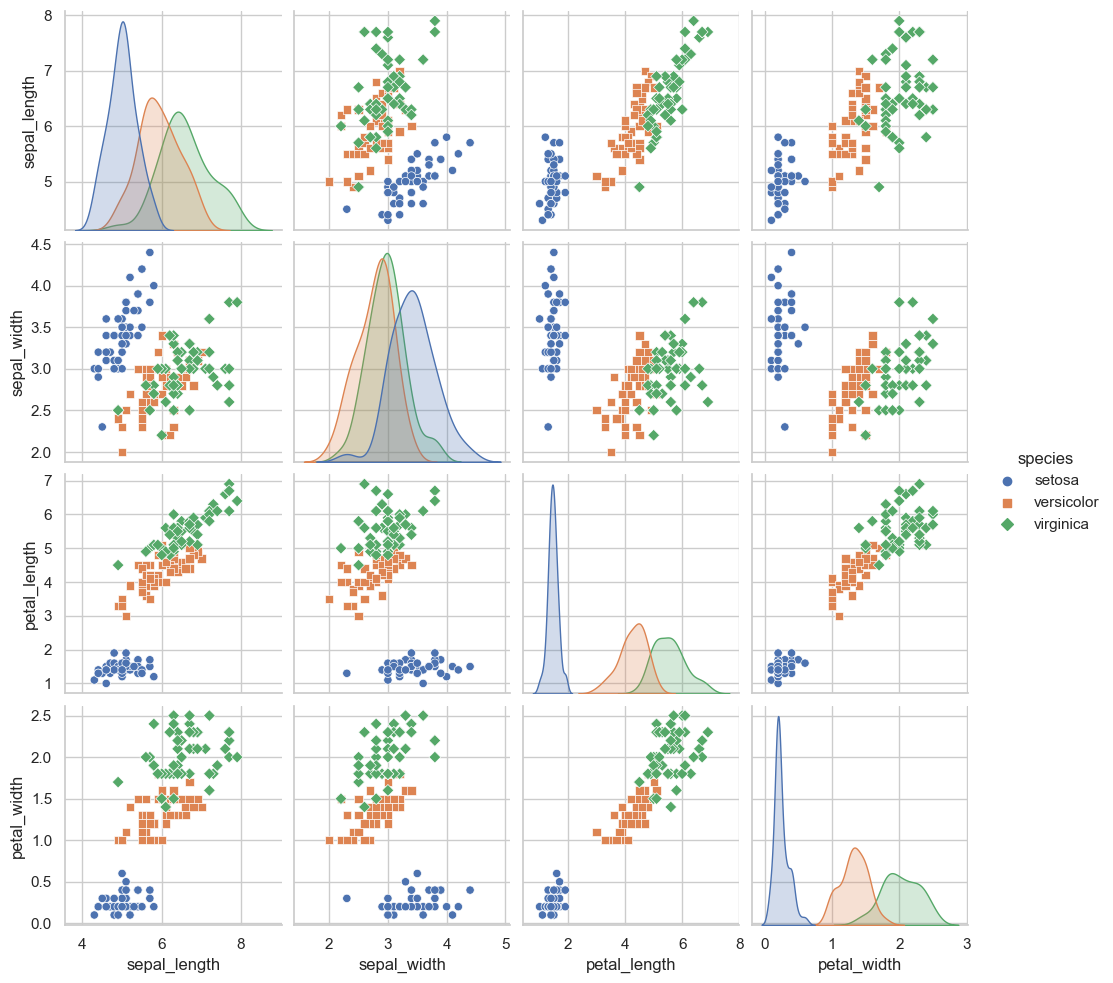

In [10]:
sns.set(style="whitegrid")

# Plot the distributions of features for each species
sns.pairplot(df, hue='species', markers=["o", "s", "D"], diag_kind="kde")
plt.show()

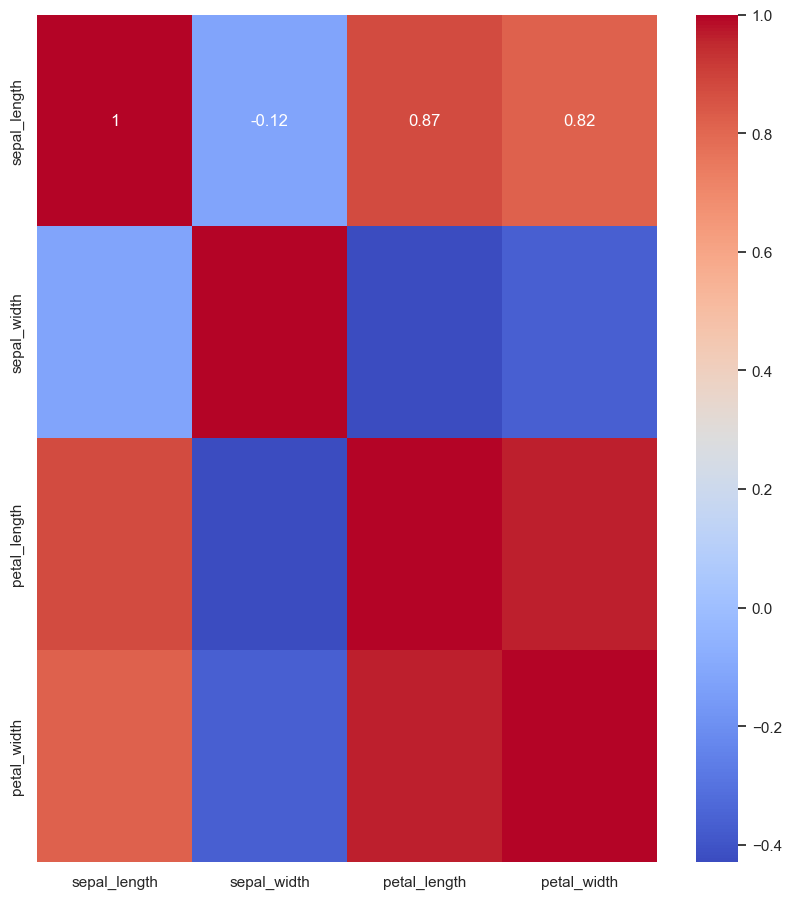

In [11]:
plt.figure(figsize = (10,11))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


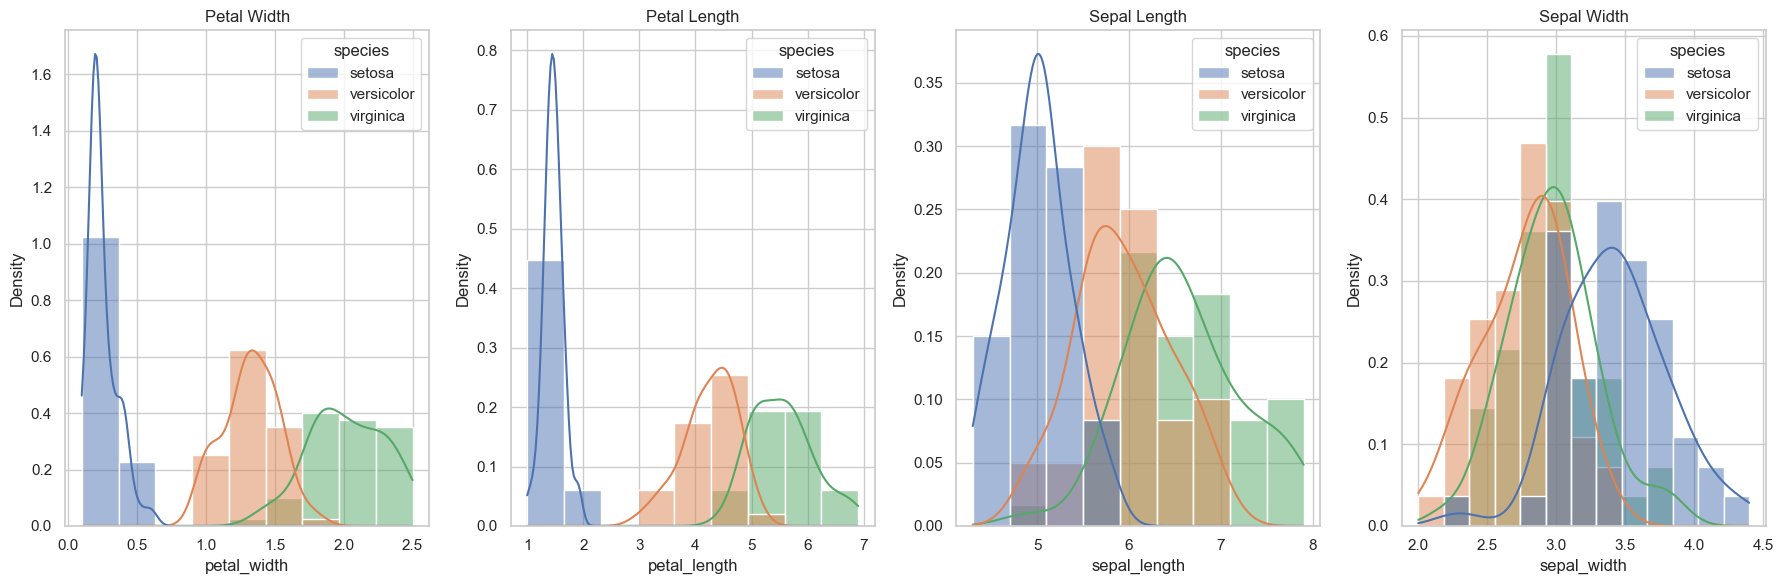

In [13]:
plt.figure(figsize=(18, 6))

# Petal width
plt.subplot(1, 4, 1)
sns.histplot(data=df, x="petal_width", hue="species", stat="density", kde=True)
plt.title("Petal Width")

# Petal length
plt.subplot(1, 4, 2)
sns.histplot(data=df, x="petal_length", hue="species", stat="density", kde=True)
plt.title("Petal Length")

# Sepal length
plt.subplot(1, 4, 3)
sns.histplot(data=df, x="sepal_length", hue="species", stat="density", kde=True)
plt.title("Sepal Length")

# Sepal width
plt.subplot(1, 4, 4)
sns.histplot(data=df, x="sepal_width", hue="species", stat="density", kde=True)
plt.title("Sepal Width")

plt.tight_layout()
plt.show()

### Sonuçlar

* Dört sayısal veri barındıran sütunumuz varken, analiz etmeyi hedeflediğimiz veri olan sadece bir kategorik sütunumuz vardır (çiçek türleri).

* Veri kümesi dengelidir, yani her üç tür için eşit kayıtlar mevcuttur.

* Verimiz de hiç eksik değer yok.

* Boxplot grafiği üzeinden gördüğümüz kadarıyla ciddi bir Outlier sorunumuz yok.

* Taç yaprak genişliği ile taç yaprak uzunluğu arasında güçlü bir korelasyon mevcuttur.

* Setosa türleri, küçük boyutlu olmasından dolayı dolayı en kolay ayırt edilebilen türdür.

* Versicolor ve Virginica türleri genellikle karıştırılır ve bazen ayrılması zordur. Ancak genellikle Versicolor türünün boyutları daha ortalama değerdedir. Buna karşın virginica türünün boyutları daha büyüktür.

In [15]:
# target değişkenimizi numeric forma dönüştürüyoruz

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit_transform(df["species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
df["species"] = le.fit_transform(df["species"])

In [18]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

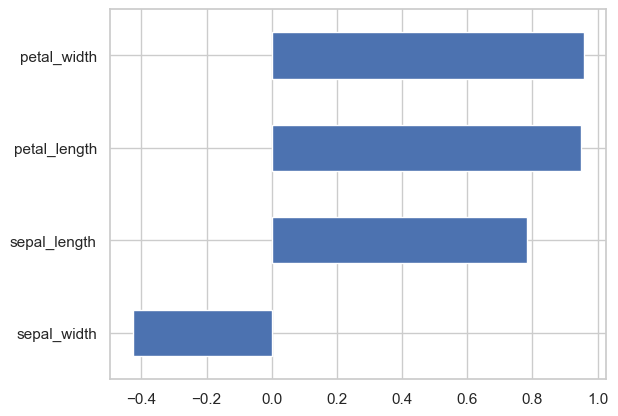

In [19]:
# target değişkeninin nümeric dönüşüm sonrası feature'lar ile korelasyonu 

df.corr()['species'][:-1].sort_values().plot.barh();

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train-Test Split

In [21]:
X = df .drop("species", axis = 1)
y = df["species"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ANN Model

#### ÖNEMLİ:
* Veri setinizdeki hedef değişkenler sınıf numaraları şeklinde ise, yani her sınıf bir sayı ile temsil ediliyorsa, **sparse_categorical_crossentropy** kayıp fonksiyonunu kullanmanız daha uygun olacaktır. Eğer one-hot kodlaması kullanılıyorsa, o zaman **categorical_crossentropy** tercih edilir. Biz taget değişkenimizin durumundan dolayı sparse_categorical_crossentropy loss fonksiyonunu tercih edicez 
* Eğer modelimizde categorical_crossentropy kullanıcak olsaydık önce **from tensorflow.keras.utils import to_categorical** import edip sonra da y verimiz üzerinde sırayla **y_train_encoded = to_categorical(y_train)** ve **y_test_encoded = to_categorical(y_test)** yapmamız gerekecekti

In [25]:
# Build the model
model = Sequential([
    Dense(units=10, activation="relu"),
    Dense(units=10, activation="relu"),             # nöron sayısını azalttığımıızda epoch arttırmak gerekti
    Dense(units=3, activation="softmax")
])

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=5, epochs=200)

Epoch 1/200
24/24 [==============================] - 1s 18ms/step - loss: 1.2546 - accuracy: 0.6333 - val_loss: 1.1345 - val_accuracy: 0.7000
Epoch 2/200
24/24 [==============================] - 0s 5ms/step - loss: 1.1424 - accuracy: 0.6583 - val_loss: 1.0519 - val_accuracy: 0.7000
Epoch 3/200
24/24 [==============================] - 0s 6ms/step - loss: 1.0789 - accuracy: 0.5917 - val_loss: 1.0013 - val_accuracy: 0.5333
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 1.0271 - accuracy: 0.4583 - val_loss: 0.9627 - val_accuracy: 0.4667
Epoch 5/200
24/24 [==============================] - 0s 6ms/step - loss: 0.9838 - accuracy: 0.5667 - val_loss: 0.9209 - val_accuracy: 0.7000
Epoch 6/200
24/24 [==============================] - 0s 6ms/step - loss: 0.9356 - accuracy: 0.6417 - val_loss: 0.8732 - val_accuracy: 0.7000
Epoch 7/200
24/24 [==============================] - 0s 6ms/step - loss: 0.8858 - accuracy: 0.7000 - val_loss: 0.8261 - val_accuracy: 0.7333
Epoch 8/200


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (5, 10)                   50        
                                                                 
 dense_1 (Dense)             (5, 10)                   110       
                                                                 
 dense_2 (Dense)             (5, 3)                    33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


* Verimiz büyük ve kompleks bir form da olmadığı için Dropout ve Early stopping yöntemlerini uygulamadık

In [27]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [28]:
eval_metric(model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 41ms/step
Test Set:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Train Set:
[[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



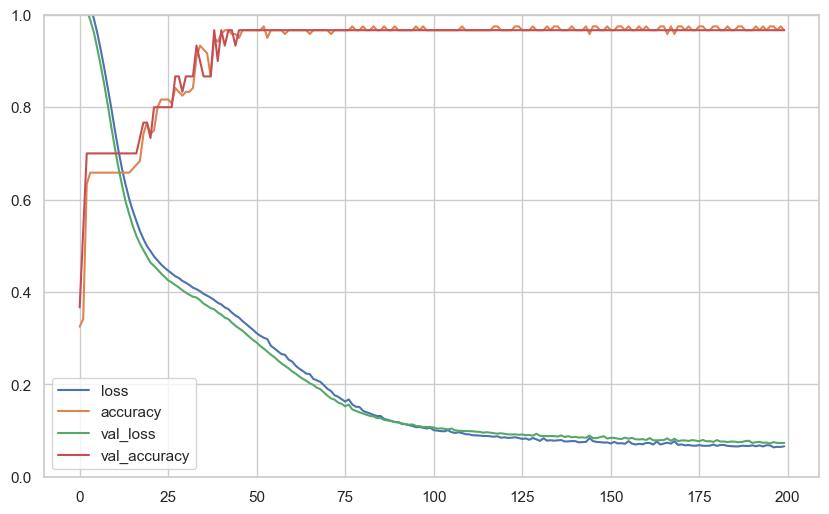

In [28]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Accuracy during Training :
------------------------------------


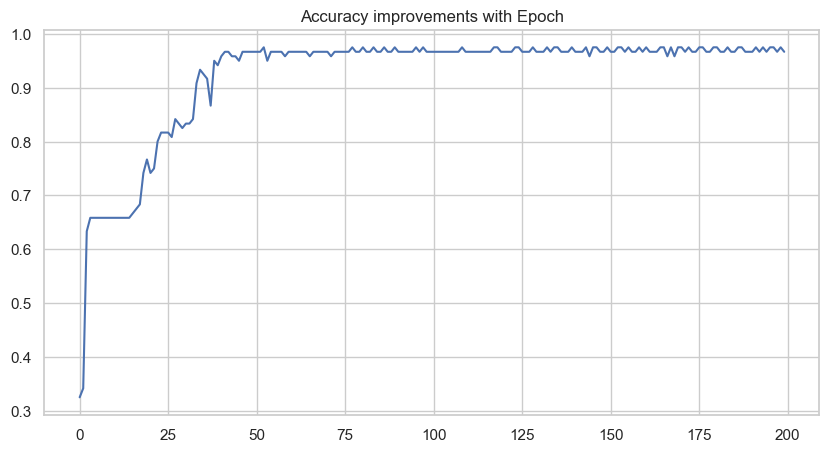

In [29]:
# Sadece Accuracy değişimine bakalım

print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

## Final Model and Model Deployment

In [30]:
X.shape

(150, 4)

In [31]:
y.shape

(150,)

In [32]:
scaler = MinMaxScaler().fit(X)

In [33]:
# MinMaxScaler işleminin kaydedilmesi
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [34]:
X_scaled = scaler.transform(X)

In [35]:
final_model = Sequential([
            Dense(units=10, activation="relu"),
            Dense(units=10, activation="relu"),             # nöron sayısını azalttığımıızda epoch arttırmak gerekti
            Dense(units=3, activation="softmax")
    ])

opt = Adam(learning_rate=0.001)

final_model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

final_model.fit(x=X_scaled, y=y, batch_size=5, epochs=200) 

Epoch 1/200
30/30 [==============================] - 1s 4ms/step - loss: 1.0682 - accuracy: 0.3333
Epoch 2/200
30/30 [==============================] - 0s 5ms/step - loss: 1.0337 - accuracy: 0.3467
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 0.9989 - accuracy: 0.4867
Epoch 4/200
30/30 [==============================] - 0s 3ms/step - loss: 0.9611 - accuracy: 0.5933
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.9246 - accuracy: 0.6333
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 0.8882 - accuracy: 0.6533
Epoch 7/200
30/30 [==============================] - 0s 4ms/step - loss: 0.8523 - accuracy: 0.6667
Epoch 8/200
30/30 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.6667
Epoch 9/200
30/30 [==============================] - 0s 3ms/step - loss: 0.7783 - accuracy: 0.6667
Epoch 10/200
30/30 [==============================] - 0s 4ms/step - loss: 0.7379 - accuracy: 0.6667
Epoch 11/

In [36]:
# Modelin kaydedilmesi

final_model.save('final_model_ANN_iris.h5') 

### Kaydedilmiş Model Üzerinden Prediction 

In [37]:
# Manuel datamızı oluşturuyoruz 

my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]}

sample_ann = pd.DataFrame(my_dict)
sample_ann

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [38]:
# min-max scaler dosyasının yüklenmesi
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [39]:
sample_scaled = scaler_iris.transform(sample_ann)
sample_scaled

array([[0.05555556, 0.08333333, 0.05084746, 0.04166667],
       [0.41666667, 0.41666667, 0.55932203, 0.5       ],
       [0.88888889, 0.91666667, 0.93220339, 0.91666667]])

In [40]:
# daha önceden eğitilmiş modelin yüklenmsi

from tensorflow.keras.models import load_model

In [41]:
final_model = load_model('final_model_ANN_iris.h5')

In [42]:
final_model.predict(sample_scaled)

1/1 [==============================] - 0s 107ms/step


array([[9.9963629e-01, 3.6364153e-04, 8.3658724e-09],
       [9.6987707e-05, 9.9866235e-01, 1.2406379e-03],
       [1.4797904e-11, 1.6109815e-03, 9.9838901e-01]], dtype=float32)

In [43]:
y_pred_probabilities = final_model.predict(sample_scaled)
y_pred = y_pred_probabilities.argmax(axis=1)

1/1 [==============================] - 0s 53ms/step


In [44]:
sample_ann["pred"] = y_pred
sample_ann

,sepal_length,sepal_width,petal_length,petal_width,pred
0,4.5,2.2,1.3,0.2,0
1,5.8,3.0,4.3,1.3,1
2,7.5,4.2,6.5,2.3,2


In [45]:
predictions = final_model.predict(sample_scaled)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

1/1 [==============================] - 0s 49ms/step


In [46]:
normalized_predictions

array([[0.57598364, 0.21204671, 0.21196961],
       [0.21206526, 0.5756268 , 0.21230794],
       [0.21206574, 0.21240765, 0.57552654]], dtype=float32)

In [47]:
sample_ann["pred_proba_setosa"] = normalized_predictions[:,0]
sample_ann["pred_proba_versicolor"] = normalized_predictions[:,1]
sample_ann["pred_proba_virginica"] = normalized_predictions[:,2]
sample_ann

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.575984,0.212047,0.211970
1,5.8,3.0,4.3,1.3,1,0.212065,0.575627,0.212308
2,7.5,4.2,6.5,2.3,2,0.212066,0.212408,0.575527


## xgboost Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
X_train.shape

(120, 4)

In [50]:
import xgboost as xgb
xgb_cls = xgb.XGBClassifier(objective = "multiclass:softmax", num_class = 3)

In [51]:
xgb_cls.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
preds = xgb_cls.predict(X_test)

In [53]:
preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [54]:
np.array(y_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [55]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [56]:
eval_metric(xgb_cls, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [57]:
from sklearn.model_selection import cross_validate

model = xgb.XGBClassifier(objective = "multiclass:softmax", num_class = 3)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                            'f1_weighted'], cv = 20)
                                                        
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

test_accuracy              0.941667
test_precision_weighted    0.955556
test_recall_weighted       0.941667
test_f1_weighted           0.938889
dtype: float64

## Final Model and Model Deployment

In [58]:
final_model = xgb.XGBClassifier(objective = "multiclass:softmax", num_class = 3).fit(X, y)

In [59]:
pickle.dump(final_model, open("final_model_xgboost_iris", 'wb'))

### Kaydedilmiş Model Üzerinden Prdiction 

In [60]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]}
sample_xgboost = pd.DataFrame(my_dict)
sample_xgboost

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [61]:
final_model = pickle.load(open("final_model_xgboost_iris", "rb"))

In [62]:
predictions = final_model.predict(sample_xgboost)
predictions_proba = final_model.predict_proba(sample_xgboost)

In [63]:
predictions_proba

array([[9.9144393e-01, 4.8739160e-03, 3.6821908e-03],
       [4.5280508e-03, 9.9358338e-01, 1.8885131e-03],
       [4.8400337e-04, 1.2608367e-03, 9.9825519e-01]], dtype=float32)

In [64]:
sample_xgboost["pred"] = predictions
sample_xgboost["pred_proba_setosa"] = predictions_proba[:,0]
sample_xgboost["pred_proba_versicolor"] = predictions_proba[:,1]
sample_xgboost["pred_proba_virginica"] = predictions_proba[:,2]
sample_xgboost

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.991444,0.004874,0.003682
1,5.8,3.0,4.3,1.3,1,0.004528,0.993583,0.001889
2,7.5,4.2,6.5,2.3,2,0.000484,0.001261,0.998255


In [65]:
sample_ann         # yukarıda XGBoost tahminleri ile aşağıda ANN tahminlerini karşılaştırabilriz

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.575984,0.212047,0.211970
1,5.8,3.0,4.3,1.3,1,0.212065,0.575627,0.212308
2,7.5,4.2,6.5,2.3,2,0.212066,0.212408,0.575527


## Alternatif Denemeler

* Bu aşamada loss function olarak sparse_categorical_crossentropy yerine categorical_crossentropy deneyip çeşitli parametre ayarlamalarıyla sonuçlarımızı karşılaştırmaya çalıştık

### categorical_crossentropy kullanımı

In [66]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)
# Test on unseen data
results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200


C:\Users\SAMSUNG\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


24/24 - 1s - loss: 1.9304 - accuracy: 0.3083 - 847ms/epoch - 35ms/step
Epoch 2/200
24/24 - 0s - loss: 1.3627 - accuracy: 0.3083 - 73ms/epoch - 3ms/step
Epoch 3/200
24/24 - 0s - loss: 1.0855 - accuracy: 0.3833 - 70ms/epoch - 3ms/step
Epoch 4/200
24/24 - 0s - loss: 0.9540 - accuracy: 0.3667 - 71ms/epoch - 3ms/step
Epoch 5/200
24/24 - 0s - loss: 0.9136 - accuracy: 0.3500 - 71ms/epoch - 3ms/step
Epoch 6/200
24/24 - 0s - loss: 0.8586 - accuracy: 0.4000 - 75ms/epoch - 3ms/step
Epoch 7/200
24/24 - 0s - loss: 0.8162 - accuracy: 0.7000 - 71ms/epoch - 3ms/step
Epoch 8/200
24/24 - 0s - loss: 0.7722 - accuracy: 0.7583 - 75ms/epoch - 3ms/step
Epoch 9/200
24/24 - 0s - loss: 0.7241 - accuracy: 0.8750 - 69ms/epoch - 3ms/step
Epoch 10/200
24/24 - 0s - loss: 0.6792 - accuracy: 0.8500 - 78ms/epoch - 3ms/step
Epoch 11/200
24/24 - 0s - loss: 0.6356 - accuracy: 0.8333 - 71ms/epoch - 3ms/step
Epoch 12/200
24/24 - 0s - loss: 0.5974 - accuracy: 0.8917 - 71ms/epoch - 3ms/step
Epoch 13/200
24/24 - 0s - loss: 0.5

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                50        
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


* Verimiz büyük ve kompleks bir form da olmadığı için Dropout ve Early stopping yöntemlerini uygulamadık

In [68]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [69]:
eval_metric(model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 52ms/step
Test Set:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train Set:
[[40  0  0]
 [ 0 37  4]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.90      0.95        41
           2       0.91      1.00      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [70]:
# Manuel datamızı oluşturuyoruz 

my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]}

sample_ann = pd.DataFrame(my_dict)
sample_scaled = scaler.transform(sample_ann)

In [71]:
sample_scaled

array([[0.05555556, 0.08333333, 0.05084746, 0.04166667],
       [0.41666667, 0.41666667, 0.55932203, 0.5       ],
       [0.88888889, 0.91666667, 0.93220339, 0.91666667]])

In [72]:
predictions = model.predict(sample_scaled)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

1/1 [==============================] - 0s 134ms/step


In [73]:
normalized_predictions

array([[0.54128873, 0.23670955, 0.22200173],
       [0.3323257 , 0.40929234, 0.25838196],
       [0.255562  , 0.4217307 , 0.3227073 ]], dtype=float32)

### Hyperparameter Tuning deneme sonuçları

* 3 hidden 16,8,4 - batch size 5 - accuracy 0.70 - epoch 200
* 3 hidden 16,8,4 - batch size 30 - accuracy 0.96 -  epoch 200
* 2 hidden 16,8  - batch size 30 - accuracy 0.92 -  epoch 200
* 2 hidden 16,8  - batch size 20 - accuracy 0.96 - epoch 200
* 2 hidden 16,8  - batch size 20 - accuracy 0.96 - epoch 100
* 2 hidden 8,4  - batch size 5 - accuracy 0.96  - epoch 100 -  learning_rate=0.001
* 2 hidden 8,4  - batch size 5 - accuracy 1.0 -  epoch 100 - learning_rate=0.003 
* 2 hidden 8,4  - batch size 10 - accuracy 0.96  - epoch 100 - learning_rate=0.003 - epoch 150 aynı sonuç
* 2 hidden 8,4  - batch size 5 - accuracy 1.0 -  epoch 150  - learning_rate=0.003  -  test size 0.1   -  loss 0,0336     **tercih 1
* 2 hidden 8,4  - batch size 20 - accuracy 1.0  - epoch 150 - learning_rate=0.003 
* 2 hidden 8,4  - batch size 30 - accuracy 0.96 - epoch 150 - learning_rate=0.003 
* 2 hidden 8,4  - batch size 40 - accuracy 0.96 -  epoch 200 - learning_rate=0.003
* 2 hidden 64,64  - batch size 14 - accuracy 0.96 -  epoch 20 - learning_rate=0.003 
* 2 hidden 64,64  - batch size 10 - accuracy 0.93  - epoch 30 - learning_rate=0.003 
* 2 hidden 64,64  - batch size 10 - accuracy 0.93 -  epoch 30 - learning_rate=0.008  - loss 0,0545
* 2 hidden 128,128  - batch size 10 - accuracy 0.96 - epoch 30 - learning_rate=0.008  - loss 0,0460
* 2 hidden 128,128  - batch size 20 - accuracy 0.96  - epoch 50 - learning_rate=0.008  - loss 0,0428
* 2 hidden 128,128  - batch size 30 - accuracy 1.0 - epoch 70 - learning_rate=0.008  - loss 0,0336
* 2 hidden 128,128  - batch size 30 - accuracy 1.0 -  epoch 80 - learning_rate=0.01  - loss 0,0412
* 2 hidden 128,128  - batch size 40 - accuracy 1.0  - epoch 80 - learning_rate=0.01  - loss 0,0412
* 2 hidden 128,128  - batch size 14 - accuracy 0.96 - epoch 20 - learning_rate=0.003  

## Sonuç ve Çıkarımlar

* Genel olarak 2 hidden layer seçeneklerimiz de daha yüksek score lar elde ettik
* Nöron sayılarını belirlerken iki seçenek karşımıza çıktı 
  - Eğer düşük nöronlar(16, 8, 4 gibi) seçtiysek, 5-40 arası batch size için 100-200 epoch denemeleri ile 0.96 ile 1.00 arası score'lar elde ettik
  - Eğer yüksek nöronlar(64, 128 gibi) seçtiysek, 10-40 arası batch size için 20-100 epoch denemeleri ile 0.96 ile 1.00 arası score'lar elde ettik
* Burdan çıkardığımız sonuçlar:
    - Yüksek nöron seçiminde düşük epoch denemelerinin yeterli olduğu
    - Düşük batch size seçiminde yüksek epoch denemelerinin gerekmediği (burada ki kıyaslama yüksek batch size seçimlerine göre)
    - Verinin az olduğu durumlarda ANN de çok fazla altenatif parametre ayarları yapabilsekde sonucun çok değişmediği görüldü. Hatta XGBoost modeline göre çiçek türü tahminlerinde ANN düşük probability ile karar verdiği görüldü. Örneğin aşağıda ki 2 modelin tahminlerinde XGBoost yüksek probability(0.99) ile çiçek türüne karar verirken, ANN de bir çok farklı parametre denemelerine rağmen max 0.58 ile çiçek türü tahminlerini gerçekleştirdiği görüldü.

In [74]:
sample_xgboost     # xgboost modeli tahmin sonuçları 

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.991444,0.004874,0.003682
1,5.8,3.0,4.3,1.3,1,0.004528,0.993583,0.001889
2,7.5,4.2,6.5,2.3,2,0.000484,0.001261,0.998255


In [75]:
sample_ann       # ANN modeli tahmin sonuçları        

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


# Streamlit 

### EDA - Prediction (XGBOOST - ANN)

In [10]:
%%writefile iris_app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from keras import models
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

iris = pd.read_csv("iris.csv")

st.markdown(
    """
    <style>
    .stApp {
        background-color: #e6dd27;  /* Koyu sarı renk */
    </style>
    """,
    unsafe_allow_html=True
)

# Sekmeleri ekleyin
selected_tab = st.sidebar.selectbox("Select Page", ["EDA", "Prediction"])

if selected_tab == "EDA":
   
    #st.sidebar.header('User Input Parameters for EDA')
    # EDA ile ilgili kodları burada ekleyin, veri görselleştirmeleri vb.
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Exploring Data Analysis (EDA)</p>', unsafe_allow_html=True)
    st.image("https://data-flair.training/blogs/wp-content/uploads/sites/2/2021/10/iris-flower.webp", use_column_width=True)
    
    plt.figure(figsize=(8, 6))
    ax=sns.countplot(data=iris, x='species')
    ax.bar_label(ax.containers[0])
    plt.title('Species Distribution in Iris Dataset')
    plt.xlabel('Species')
    plt.ylabel('Count')
    st.pyplot(plt)
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Statistical Properties of the Features</p>', unsafe_allow_html=True)
    st.dataframe(iris.describe())
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Plot the Distributions of Features For Each Species</p>', unsafe_allow_html=True)
    sns.set(style="whitegrid")
    sns.pairplot(iris, hue='species', markers=["o", "s", "D"], diag_kind="kde")
    st.pyplot(plt)
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Status of Outliers</p>', unsafe_allow_html=True)
    sns.set(style = "ticks")
    plt.figure(figsize = (12,10))

    plt.subplot(2,2,1)                                                 
    sns.boxplot(x = "species", y = "sepal_length", data = iris)
    plt.subplot(2,2,2)
    sns.boxplot(x = "species", y = "sepal_width", data = iris)
    plt.subplot(2,2,3)
    sns.boxplot(x = "species", y = "petal_length", data = iris)
    plt.subplot(2,2,4)
    sns.boxplot(x = "species", y = "petal_width", data = iris)
    st.pyplot(plt)
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Correlation Table</p>', unsafe_allow_html=True)
    plt.figure(figsize = (10,11))
    sns.heatmap(iris.corr(), annot = True, cmap = "coolwarm")
    st.pyplot(plt)
    
elif selected_tab == "Prediction":
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">IRIS Flower Classification using TensorFlow</p>', unsafe_allow_html=True)
    st.image("https://miro.medium.com/v2/resize:fit:1200/1*S2GII1ul0JjbZ0YaFvDByw.jpeg", use_column_width=True)

    # Metni ortala
    st.markdown('<p style="text-align: center; font-size: 20px;">This app predicts the <strong>Iris flower</strong> type!</p>', unsafe_allow_html=True)
     
    model_option = st.sidebar.selectbox("Select Model", ["XGBoost", "Artificial Neural Network"])
    # Tahmin sekmesi içeriği
    st.sidebar.header('User Input Parameters for Prediction')
    
    def user_input_features():
        sepal_length = st.sidebar.slider('Sepal length', 4.3, 7.9, 5.4, step=0.1)
        sepal_width = st.sidebar.slider('Sepal width', 2.0, 4.4, 3.4)
        petal_length = st.sidebar.slider('Petal length', 1.0, 6.9, 1.3)
        petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
        data = {'sepal_length': sepal_length,
                'sepal_width': sepal_width,
                'petal_length': petal_length,
                'petal_width': petal_width}
        features = pd.DataFrame(data, index=[0])
        return features
    
    df = user_input_features()

    # Load local Iris dataset
    #iris = pd.read_csv("iris.csv")

    final_xgboost = pickle.load(open("final_model_xgboost_iris", "rb"))
    final_ann = load_model('final_model_ANN_iris.h5')
    scaler_iris = pickle.load(open("scaler_iris", "rb"))

    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">User Input parameters</p>', unsafe_allow_html=True)
    st.dataframe(df.style.format("{:.2f}"))


    if model_option == "XGBoost":
        prediction = final_xgboost.predict(df)
        prediction_proba = final_xgboost.predict_proba(df)
        
    elif model_option == "Artificial Neural Network":     
        df_scaled = scaler_iris.transform(df)
        y_pred_probabilities = final_ann.predict(df.values)
        prediction = y_pred_probabilities.argmax(axis=1)
        prediction_proba = tf.nn.softmax(y_pred_probabilities, axis=1).numpy()

    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Class labels and their corresponding index number</p>', unsafe_allow_html=True)
    st.write(iris.species.value_counts().index)
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Prediction Probability</p>', unsafe_allow_html=True)
    st.write(prediction_proba)
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Prediction</p>', unsafe_allow_html=True)

    # İki sütunlu düzen oluşturma
    col1, col2 = st.columns([2, 1])  # İlk sütunun genişliği 2, ikincisinin genişliği 1

    # Sol sütun: Yazı
    with col1:
        st.write("<p style='color:red; font-size:25px; text-align: center; margin-top: 150px;'>Prediction: {}</p>".format(", ".join(iris.species.value_counts().index[prediction])), unsafe_allow_html=True)

    # Sağ sütun: GIF
    with col2:
        st.markdown('<div style="display: flex; justify-content: flex-end;"><img src="https://media.tenor.com/VmR4yzFeI_AAAAAi/floral-fury-cuphead.gif" alt="GIF" width="100%" style="max-width: 200px; margin-right: 150px;"></div>', unsafe_allow_html=True)


Overwriting iris_app.py


In [11]:
!streamlit run iris_app.py

^C
